# Introduction and Data Loading
This dataset captures detailed traffic patterns across major roads and intersections in Bangalore. 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../../datasets/raw/enriched_sample.csv')
df_encoded = pd.read_csv('../../datasets/processed/enriched_sample_encoded.csv')

In [22]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [23]:
df_encoded.describe(include = 'all')

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Incident Reports,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Roadwork and Construction Activity,...,Road/Intersection Name_ITPL Main Road,Road/Intersection Name_Jayanagar 4th Block,Road/Intersection Name_Marathahalli Bridge,Road/Intersection Name_Sarjapur Road,Road/Intersection Name_Silk Board Junction,Road/Intersection Name_Sony World Junction,Road/Intersection Name_South End Circle,Road/Intersection Name_Trinity Circle,Road/Intersection Name_Tumkur Road,Road/Intersection Name_Yeshwanthpur Circle
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,...,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,29236.048120,39.447427,1.375554,80.818041,1.570389,45.086651,79.950243,75.155597,114.533348,0.098702,...,0.050358,0.064906,0.055058,0.076097,0.030774,0.076544,0.066361,0.083035,0.040398,0.041741
std,13001.808801,10.707244,0.165319,23.533182,1.420047,20.208460,11.585006,14.409394,36.812573,0.298278,...,0.218695,0.246374,0.228107,0.265168,0.172716,0.265882,0.248926,0.275950,0.196903,0.200009
min,4233.000000,20.000000,1.000039,5.160279,0.000000,10.006853,60.003933,50.020411,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19413.000000,31.775825,1.242459,64.292905,0.000000,27.341191,69.828270,62.545895,94.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27600.000000,39.199368,1.500000,92.389018,1.000000,45.170684,79.992773,75.317610,102.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38058.500000,46.644517,1.500000,100.000000,2.000000,62.426485,89.957358,87.518589,111.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,72039.000000,89.790843,1.500000,100.000000,10.000000,79.979744,99.993652,99.995049,243.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# correlation matrix of entire dataset (area/street names and one-hot features excluded.)

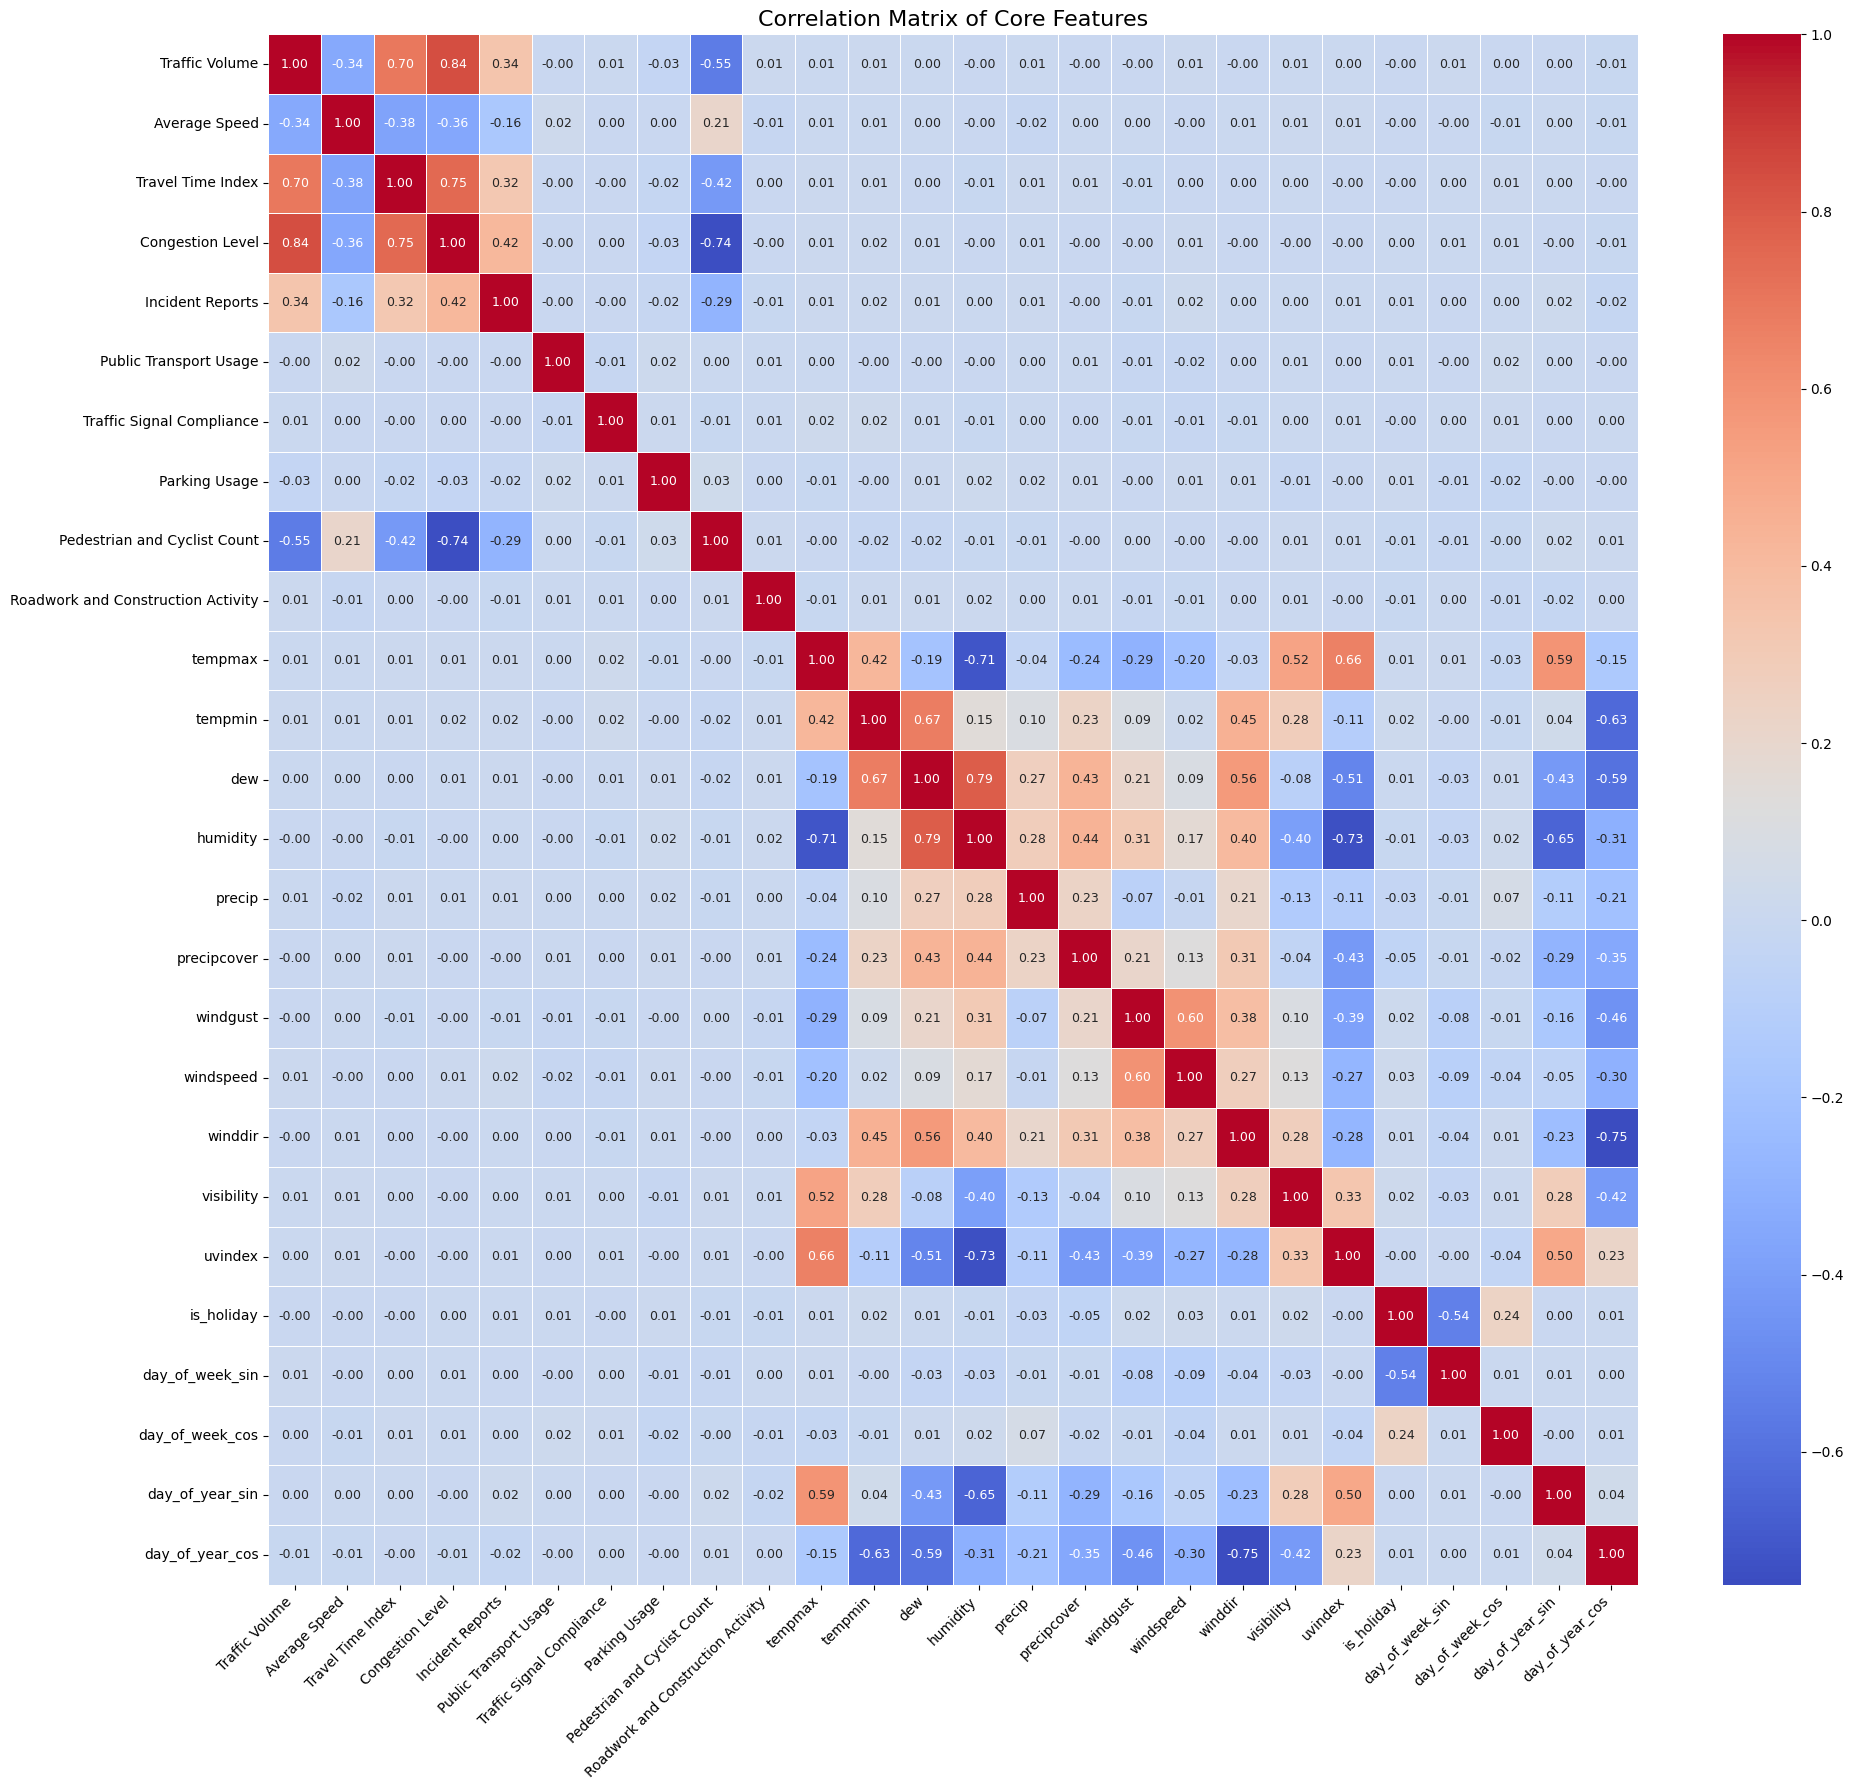

In [24]:
all_cols = df_encoded.columns.tolist()

# Find all the one-hot encoded "dummy" columns
dummy_cols = [col for col in all_cols if 
              'Weather Conditions_' in col or 
              'Area Name_' in col or 
              'Road/Intersection Name_' in col]

# Create a new list of "core features" by excluding the dummy columns
core_features = [col for col in all_cols if col not in dummy_cols]

# Now, create the correlation matrix on this smaller, "core" DataFrame
core_corr_matrix = df_encoded[core_features].corr()
# --- End of new part ---


# Plot the heatmap (using your code, but on the new matrix)
plt.figure(figsize=(20, 18)) # Make it larger to fit the ~20 core features
sns.heatmap(
    core_corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    annot_kws={"size": 9} # Make annotations smaller
)
plt.title('Correlation Matrix of Core Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation of all features with just traffic volume. Tells us how strongly each feature predicts the target (traffic volume).

/var/folders/9q/6x_knwl90m94452ctg8tbmvm0000gn/T/ipykernel_62144/902549081.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




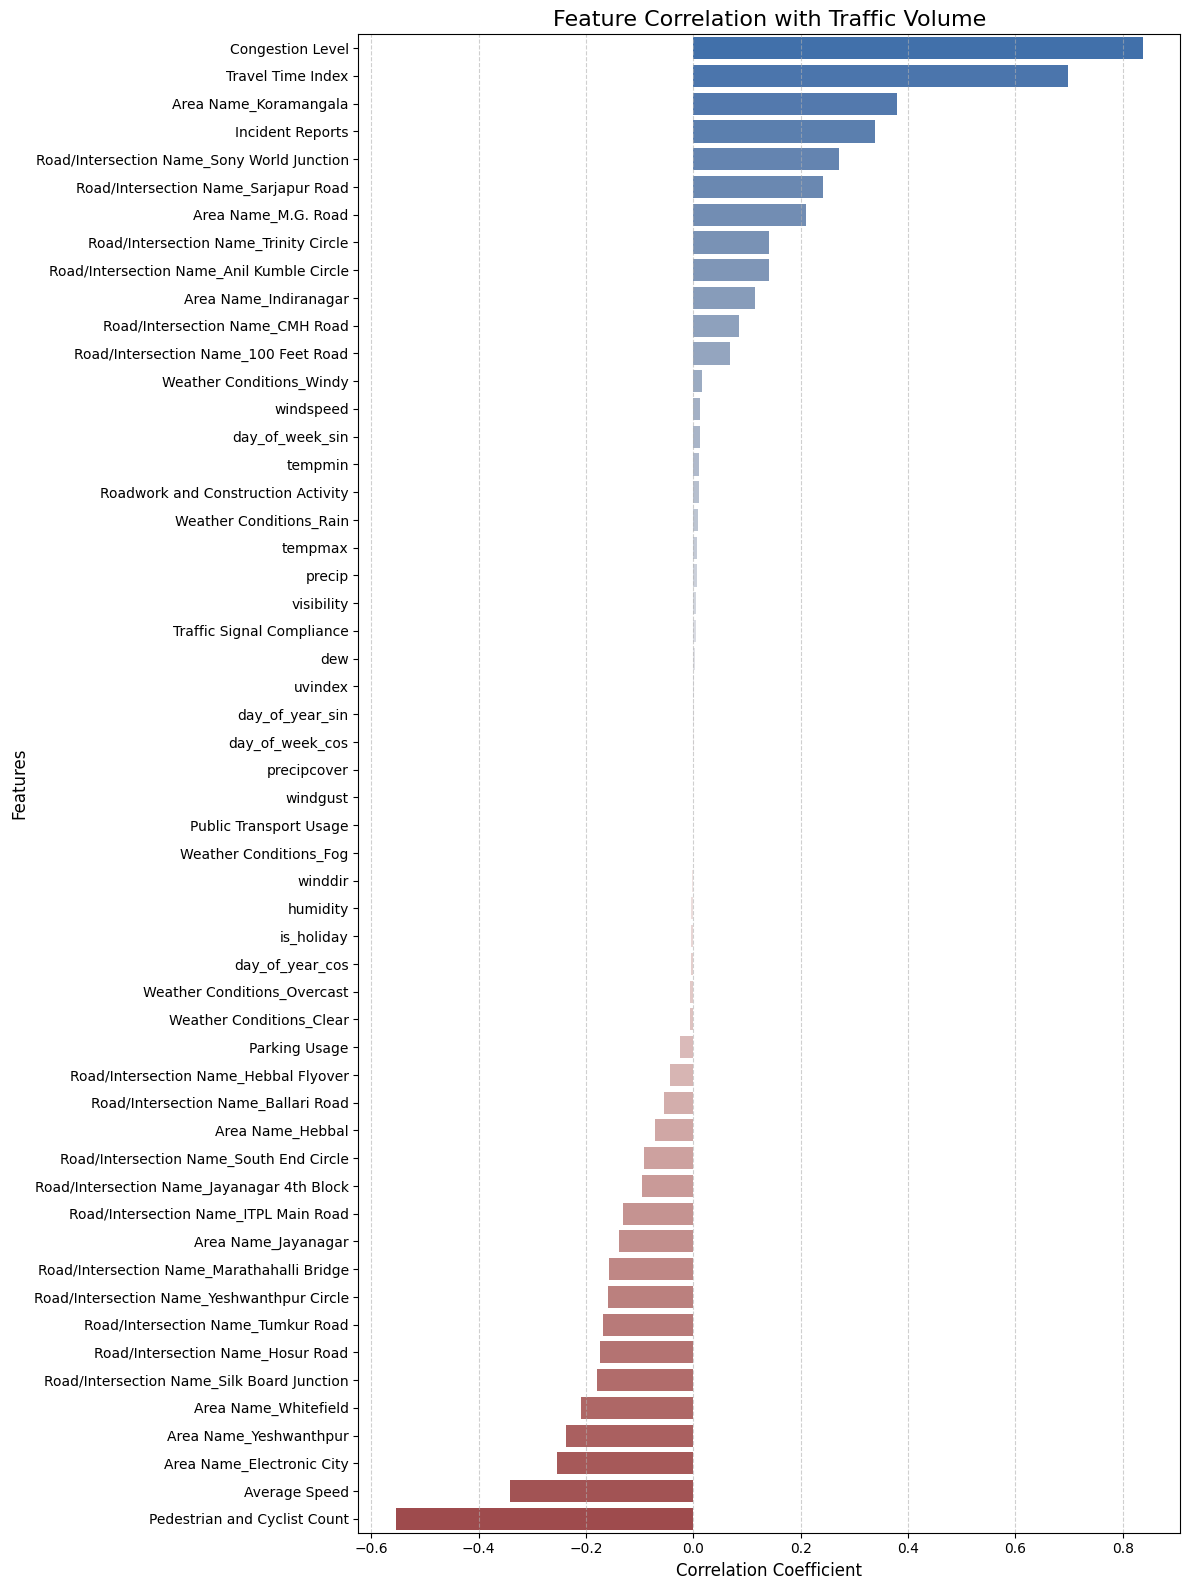

In [25]:
# Get the correlation of all features with just 'Traffic Volume'
# .corr() finds the correlation of every column with every other column.
# We are just selecting the 'Traffic Volume' column from that matrix.
corr_matrix = df_encoded.corr()
target_corr = corr_matrix['Traffic Volume']

# Remove the self-correlation (Traffic Volume vs. Traffic Volume is 1.0)
target_corr = target_corr.drop('Traffic Volume')

# Sort the values to see the strongest relationships
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 16)) # Make the figure tall to fit all feature names
sns.barplot(
    x=target_corr_sorted.values, 
    y=target_corr_sorted.index, 
    palette='vlag' # A good "diverging" colormap (red=neg, blue=pos)
)

plt.title('Feature Correlation with Traffic Volume', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout() # Fits labels cleanly
plt.show()

# EDA of the Dataset

# 1. Heat Map

In [26]:
heatmap_data = df.pivot_table(values='Traffic Volume', index='Area Name', columns='Road/Intersection Name', aggfunc='sum')
fig = px.imshow(heatmap_data, labels=dict(x="Road/Intersection Name", y="Area Name", color="Traffic Volume"),
                title="Heatmap of Traffic Volume Across Areas and Roads")
fig

This heatmap shows that areas such as Koramangala and Indiranagar record higher traffic volumes across multiple roads, marking them as key hubs.

# 2. SunBurst Chart


In [27]:
fig = px.sunburst(df, path=['Area Name', 'Road/Intersection Name'], values='Traffic Volume',
                  title="Sunburst Chart of Traffic Volume by Area, Road, and Intersection")
fig.show()

The sunburst chart highlights that within areas such as Koramangala and Indiranagar, roads like Sony World Junction and 100 Feet Road dominate traffic volumes and are major pressure points.

# 3. Scatter Plot

In [28]:
fig = px.scatter(df, x='Traffic Volume', y='Average Speed', color='Congestion Level', 
                 size='Traffic Volume', hover_data=['Area Name', 'Road/Intersection Name'],
                 title="Scatter Plot of Traffic Volume vs. Average Speed with Congestion Level")
fig.show()


This plot shows an inverse relationship between traffic volume and average speed: high-volume areas such as Indiranagar usually record lower speeds, signalling heavier congestion.

# 4. BoxPlot

In [29]:
fig = px.box(df, x='Area Name', y='Travel Time Index', 
             title="Box Plot of Travel Time Index by Area")
fig.show()

Koramangala shows a wider spread in the Travel Time Index, suggesting less predictable travel times and more variable congestion.

# 5. PieChart

In [30]:
incident_data = df.groupby('Area Name')['Incident Reports'].sum().reset_index()
fig = px.pie(incident_data, values='Incident Reports', names='Area Name',
             title="Pie Chart of Incident Reports by Area")
fig.show()


M.G. Road and Koramangala account for a large share of traffic incidents, signalling the need for added traffic management and safety measures in these areas.

# 6. Histogram

In [31]:
fig = px.histogram(df, x='Road Capacity Utilization', nbins=20,
                   title="Histogram of Road Capacity Utilization")
fig.show()


The histogram shows that many roads operate at or near full capacity, indicating a need for either added infrastructure or better traffic flow optimization to prevent overload.

# 7. RadialBar Chart

In [32]:
congestion_data = df.groupby('Area Name')['Congestion Level'].mean().reset_index()
fig = px.bar_polar(congestion_data, r='Congestion Level', theta='Area Name',
                   title="Radial Bar Chart of Congestion Levels by Area")
fig.show()

Areas such as M.G. Road and Koramangala exhibit consistently high congestion levels, so the city may need targeted interventions to relieve pressure there.

# 8. Density Plot

In [33]:
fig = px.density_contour(df, x='Average Speed', y='Traffic Volume',
                         title="Density Plot of Average Speed and Traffic Volume")
fig.show()

The density plot shows traffic clustering around moderate speeds and high volumes, suggesting similar flow patterns across much of the city.

# 9. Stacked Bar Chart

In [34]:
fig = px.histogram(df, x='Weather Conditions', y='Traffic Volume', color='Area Name', 
                   barmode='stack', title="Stacked Bar Chart of Traffic Volume by Weather Conditions")
fig.show()

Clear weather corresponds with higher traffic volumes across all areas, implying that adverse conditions tend to suppress road usage.

# K-Means Clustering.

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [
    'Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level',
    'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
    'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
    'Pedestrian and Cyclist Count'
]
numerical_data = df[numerical_columns]

### Data Standardization- StandardScaler transforms the numerical features to a mean of 0 and a standard deviation of 1.### Dimensionality Reduction with PCA- PCA reduces the data to two components so that clustering is easier to visualise.

In [36]:
# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

### Elbow Method for Selecting k- The elbow curve plots inertia against candidate k values and highlights where the improvements begin to level off.

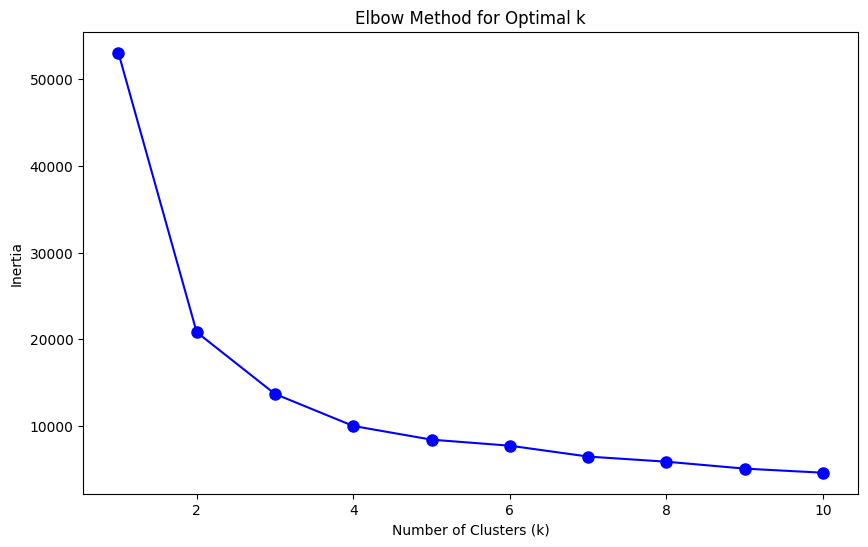

In [37]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### K-means Clustering- Run k-means on the PCA-reduced data with k = 2 and attach the labels back to the original dataset.- Visualise the clusters on the PCA plane and compare feature distributions with boxplots to understand their characteristics.

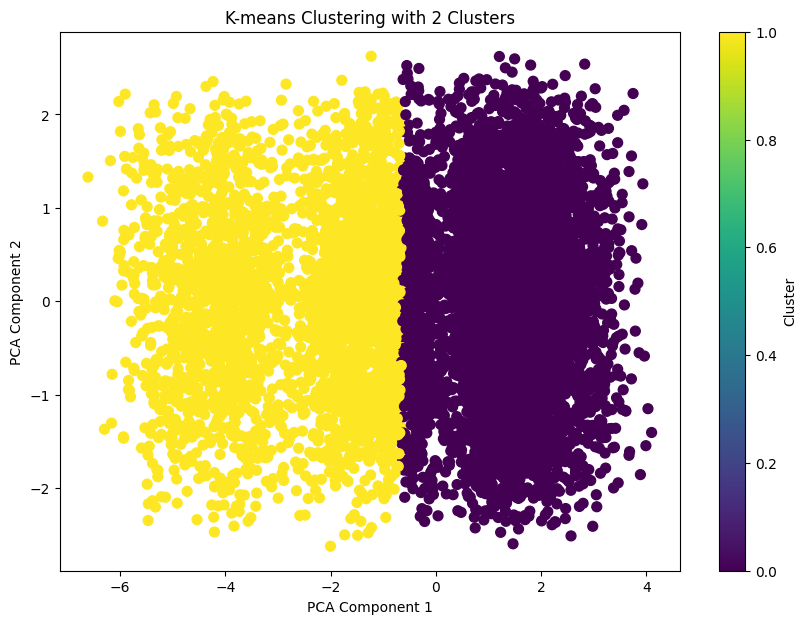

          0         1
0  1.357056  0.001392
1 -2.658391 -0.002726


In [38]:

optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_data)
df['Cluster'] = kmeans.labels_

# Visualize the Clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Inspect Cluster Centers in Original Feature Space
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers)
print(cluster_centers_df)

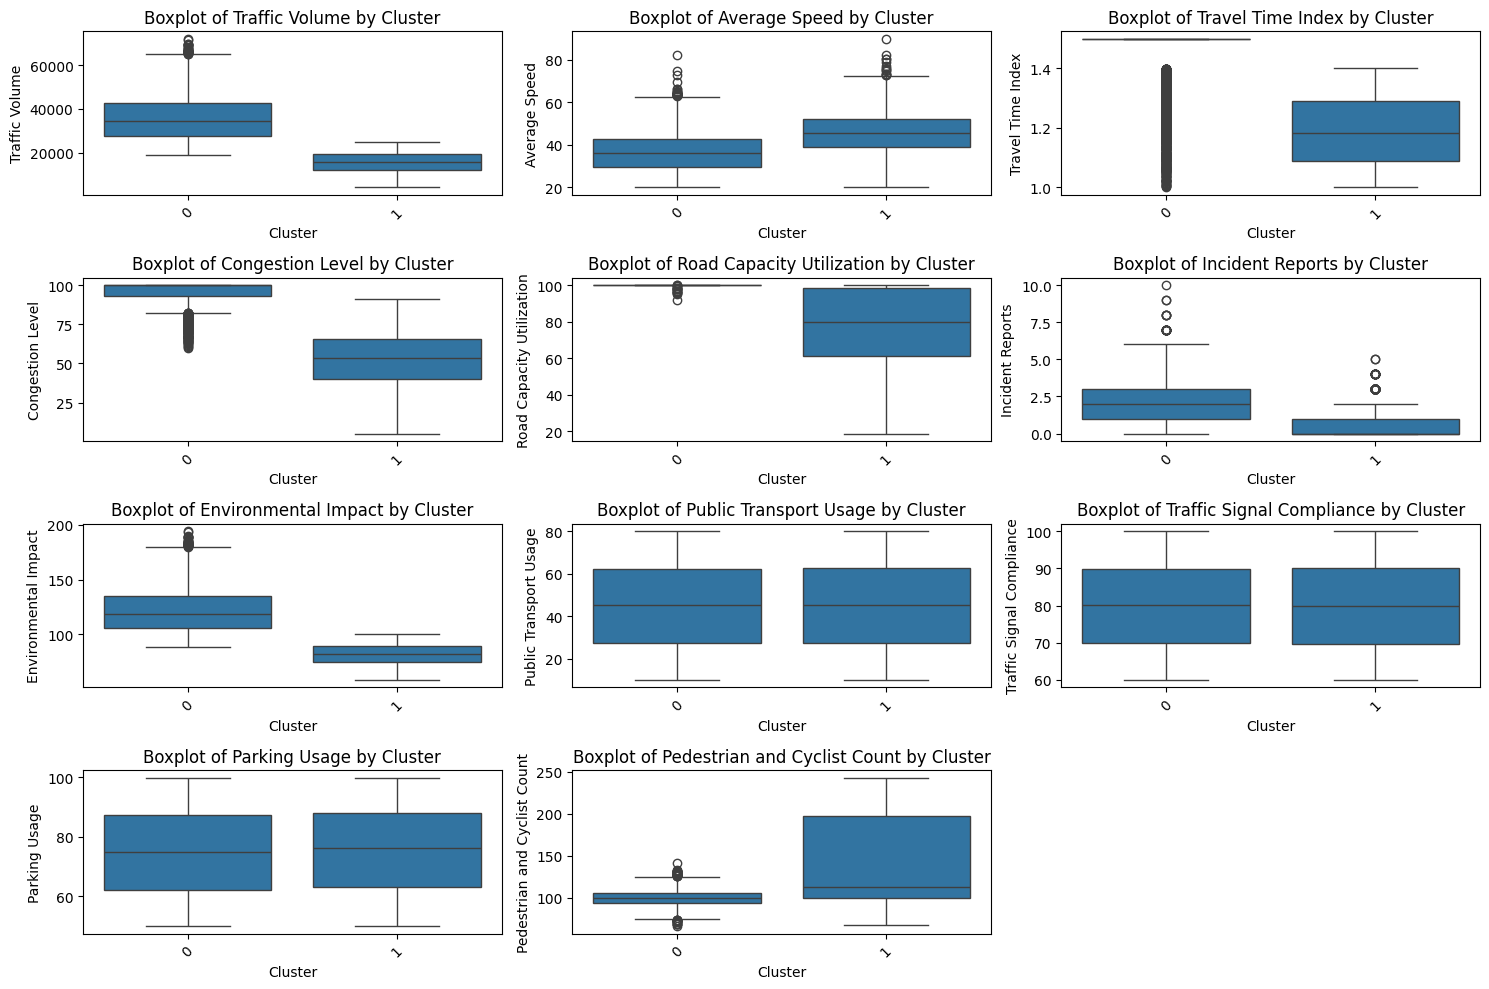

In [39]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Cluster 0

Cluster 0 covers areas with lower traffic volumes and moderate speeds (median roughly 25,000 vehicles and 50 km/h, with some low-end outliers).- The travel time index stays near 1.5, signalling typical peak-hour congestion with occasional variability.- Congestion levels centre on 40–50%, though conditions range widely across roads.

- Road capacity utilisation typically sits around 75–80%, although some corridors operate much higher or lower.- Incident reports are generally low (median close to two) but occasionally spike.- Environmental impact is modest with a median near 100 units, though a few locations register higher stress.- Public transport usage is balanced at roughly 50–60%.- Traffic signal compliance hovers around 80% across the cluster.- Parking usage sits near 80%, and pedestrian or cyclist counts are relatively high (median about 150).

## Cluster 1

Cluster 1 captures the more congested urban corridors, averaging about 40,000 vehicles with median speeds near 30 km/h.- The travel time index still centres around 1.5 but shows many outliers, signalling severe congestion in some segments.- Congestion levels sit near 100%, indicating that several roads run at full load during peak periods.- Road capacity utilisation clusters around 100%, and incidents are more common (median about two with a wide spread).

- Environmental impact is higher in this cluster with a median close to 150 units and some very stressed corridors.- Public transport usage is slightly higher than in Cluster 0, at roughly 60–70%.- Traffic signal compliance mirrors Cluster 0 near 80%.- Parking demand remains high at about 80%.- Pedestrian and cyclist counts dip slightly to a median near 100.

# Rule Based Inference.

This step aggregates traffic metrics by area and road, summarises incidents and environmental impact, and generates tailored advisories covering congestion, speed, travel time, and weather.

In [40]:
aggregated_df = df.groupby(['Area Name', 'Road/Intersection Name']).agg({
    'Traffic Volume': 'mean',
    'Average Speed': 'mean',
    'Travel Time Index': 'mean',
    'Congestion Level': 'mean',
    'Road Capacity Utilization': 'mean',
    'Incident Reports': 'sum',
    'Environmental Impact': 'mean',
    'Public Transport Usage': 'mean',
    'Traffic Signal Compliance': 'mean',
    'Parking Usage': 'mean',
    'Pedestrian and Cyclist Count': 'mean',
    'Weather Conditions': lambda x: x.mode()[0],
    'Roadwork and Construction Activity': lambda x: x.mode()[0]
}).reset_index()


def generate_overall_advisory(row):
    advisories = []

    # Congestion Level Advisory
    if row['Congestion Level'] > 75:
        advisories.append("High Congestion: Recommend avoiding this area during peak hours.")
    elif row['Congestion Level'] > 50 and row['Congestion Level']<75:
        advisories.append("Moderate Congestion: Expect delays, consider alternate routes.")
    else:
        advisories.append("Low Congestion: Traffic flow is smooth.")

    # Incident Reports Advisory
    if row['Incident Reports'] > 10:  # Adjust threshold based on the entire data
        advisories.append("High Incident Rate: Increased likelihood of delays due to incidents.")
    elif row['Incident Reports'] > 5:
        advisories.append("Moderate Incident Rate: Stay alert for possible minor delays.")
    else:
        advisories.append("Low Incident Rate: No significant incidents reported.")

    # Environmental Impact Advisory
    if row['Environmental Impact'] > 150:
        advisories.append("High Environmental Impact: Consider reducing travel in this area to lower emissions.")
    elif row['Environmental Impact'] > 100:
        advisories.append("Moderate Environmental Impact: Monitor air quality if sensitive.")
    else:
        advisories.append("Low Environmental Impact: Air quality is within acceptable limits.")

    # Average Speed Advisory
    if row['Average Speed'] < 20:
        advisories.append("Low Speed: Traffic is slow, possibly due to congestion or road conditions.")
    elif row['Average Speed'] < 40:
        advisories.append("Moderate Speed: Traffic is moving but not at optimal speed.")
    else:
        advisories.append("High Speed: Traffic is moving smoothly.")

    # Travel Time Index Advisory
    if row['Travel Time Index'] > 1.3:
        advisories.append("High Travel Time Index: Expect longer travel times than usual.")
    else:
        advisories.append("Normal Travel Time Index: Travel times are as expected.")

    # Weather Conditions Advisory
    if row['Weather Conditions'] == 'Rain':
        advisories.append("Wet Conditions: Exercise caution due to wet roads.")
    elif row['Weather Conditions'] == 'Fog':
        advisories.append("Low Visibility: Drive carefully due to fog.")
    elif row['Weather Conditions'] == 'Clear':
        advisories.append("Clear Weather: No adverse weather conditions reported.")

    # Combine all advisories into a single string
    return " | ".join(advisories)

aggregated_df['Overall Advisory'] = aggregated_df.apply(generate_overall_advisory, axis=1)

for index, row in aggregated_df.iterrows():
    print(f"Area: {row['Area Name']}, Street: {row['Road/Intersection Name']}")
    print('\n')
    print(f"Overall Advisory: {row['Overall Advisory']}")
    print("-" * 180)


Area: Electronic City, Street: Hosur Road


Overall Advisory: Moderate Congestion: Expect delays, consider alternate routes. | High Incident Rate: Increased likelihood of delays due to incidents. | Low Environmental Impact: Air quality is within acceptable limits. | High Speed: Traffic is moving smoothly. | Normal Travel Time Index: Travel times are as expected. | Clear Weather: No adverse weather conditions reported.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Area: Electronic City, Street: Silk Board Junction


Overall Advisory: Moderate Congestion: Expect delays, consider alternate routes. | High Incident Rate: Increased likelihood of delays due to incidents. | Low Environmental Impact: Air quality is within acceptable limits. | High Speed: Traffic is moving smoothly. | Normal Travel Time Index: Travel times are as expected. | Clear Weather: No adv